In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import metrics
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [19]:
df = pd.read_csv("Credit.csv")
df = df.drop('Unnamed: 0', axis=1)
df['inc_gt_50'] = (df['Income'] > 50).astype(int)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
 11  inc_gt_50  400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB
None


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,inc_gt_50
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1


In [143]:
def logisticRegression(df, formula, seed=1):
    np.random.seed(seed)
    mask = np.random.rand(len(df)) < 0.8
    train_set = df[mask]
    valid_set = df[~mask]
    
    train_y, train_x = dmatrices(formula, data=train_set, return_type="dataframe")
    valid_y, valid_x = dmatrices(formula, data=valid_set, return_type="dataframe")
    
    model = LogisticRegression(fit_intercept = False, C = 1e9, max_iter=100000)
    train_y = np.array(train_y).reshape(len(train_y,))
    model.fit(train_x, train_y)
    
    train_acc = accuracy_score(train_y, model.predict(train_x))
    train_log_loss = log_loss(train_y, model.predict_proba(train_x))
    val_acc = accuracy_score(valid_y, model.predict(valid_x))
    val_maj_proportion = max(valid_set[formula.split()[0]].value_counts(normalize=True))

    return train_acc, train_log_loss, val_acc, val_maj_proportion

In [144]:
formulas = [
    "inc_gt_50 ~ Limit",
    "inc_gt_50 ~ Rating",
    "inc_gt_50 ~ Cards",
    "inc_gt_50 ~ Age",
    "inc_gt_50 ~ Education",
    "inc_gt_50 ~ Gender",
    "inc_gt_50 ~ Student",
    "inc_gt_50 ~ Married",
    "inc_gt_50 ~ Ethnicity",
    "inc_gt_50 ~ Balance",
]
better_formulas = [
    "inc_gt_50 ~ Limit + Rating",
    "inc_gt_50 ~ Limit + Balance",
    "inc_gt_50 ~ Rating + Balance",
    "inc_gt_50 ~ Limit + Rating + Balance",
]

seed = np.random.randint(2**32)
train_acc, train_log_loss, val_acc, val_maj_proportion = logisticRegression(df, "inc_gt_50 ~ Limit", seed)
print(f"\033[91mMajority class proportion of validation set: {val_maj_proportion:.4f}\033[0m")
for f in formulas:
    print(f"\033[94m{f}:\033[0m")
    train_acc, train_log_loss, val_acc, val_maj_proportion = logisticRegression(df, f, seed)
    print(f"\tValidation accuracy: {val_acc:.4f}")
print("--------------------------------------")
for f in better_formulas:
    print(f"\033[94m{f}:\033[0m")
    train_acc, train_log_loss, val_acc, val_maj_proportion = logisticRegression(df, f, seed)
    print(f"\tTraining accuracy: {train_acc:.4f}")
    print(f"\tTraining log-loss: {train_log_loss:.4f}")
    print(f"\tValidation accuracy: {val_acc:.4f}")

Majority class proportion of validation set: 0.6897
inc_gt_50 ~ Limit:
	Validation accuracy: 0.8506
inc_gt_50 ~ Rating:
	Validation accuracy: 0.8391
inc_gt_50 ~ Cards:
	Validation accuracy: 0.6897
inc_gt_50 ~ Age:
	Validation accuracy: 0.6897
inc_gt_50 ~ Education:
	Validation accuracy: 0.6897
inc_gt_50 ~ Gender:
	Validation accuracy: 0.6897
inc_gt_50 ~ Student:
	Validation accuracy: 0.6897
inc_gt_50 ~ Married:
	Validation accuracy: 0.6897
inc_gt_50 ~ Ethnicity:
	Validation accuracy: 0.6897
inc_gt_50 ~ Balance:
	Validation accuracy: 0.7471
--------------------------------------
inc_gt_50 ~ Limit + Rating:
	Training accuracy: 0.8339
	Training log-loss: 0.3729
	Validation accuracy: 0.8621
inc_gt_50 ~ Limit + Balance:
	Training accuracy: 0.9553
	Training log-loss: 0.1764
	Validation accuracy: 0.9540
inc_gt_50 ~ Rating + Balance:
	Training accuracy: 0.9521
	Training log-loss: 0.1899
	Validation accuracy: 0.9195
inc_gt_50 ~ Limit + Rating + Balance:
	Training accuracy: 0.9585
	Training log-

In [146]:
formulas = [
    "Cards ~ Income",
    "Cards ~ Limit",
    "Cards ~ Rating",
    "Cards ~ Age",
    "Cards ~ Education",
    "Cards ~ Gender",
    "Cards ~ Student",
    "Cards ~ Married",
    "Cards ~ Ethnicity",
    "Cards ~ Balance",
]
better_formulas = [
    "Cards ~ Income + Limit",
    "Cards ~ Income + Limit + Rating",
    "Cards ~ Income + Limit + Rating + Age",
]

seed = np.random.randint(2**32)
train_acc, train_log_loss, val_acc, val_maj_proportion = logisticRegression(df, "Cards ~ Limit", seed)
print(f"\033[91mMajority class proportion of validation set: {val_maj_proportion:.4f}\033[0m")
for f in formulas:
    print(f"\033[94m{f}:\033[0m")
    train_acc, train_log_loss, val_acc, val_maj_proportion = logisticRegression(df, f, seed)
    print(f"\tValidation accuracy: {val_acc:.4f}")
print("--------------------------------------")
for f in better_formulas:
    print(f"\033[94m{f}:\033[0m")
    train_acc, train_log_loss, val_acc, val_maj_proportion = logisticRegression(df, f, seed)
    print(f"\tTraining accuracy: {train_acc:.4f}")
    print(f"\tTraining log-loss: {train_log_loss:.4f}")
    print(f"\tValidation accuracy: {val_acc:.4f}")

Majority class proportion of validation set: 0.2683
Cards ~ Income:
	Validation accuracy: 0.1951
Cards ~ Limit:
	Validation accuracy: 0.2195
Cards ~ Rating:
	Validation accuracy: 0.2195
Cards ~ Age:
	Validation accuracy: 0.2561
Cards ~ Education:
	Validation accuracy: 0.2195
Cards ~ Gender:
	Validation accuracy: 0.2195
Cards ~ Student:
	Validation accuracy: 0.2195
Cards ~ Married:
	Validation accuracy: 0.2195
Cards ~ Ethnicity:
	Validation accuracy: 0.2073
Cards ~ Balance:
	Validation accuracy: 0.2195
--------------------------------------
Cards ~ Income + Limit:
	Training accuracy: 0.3082
	Training log-loss: 1.6447
	Validation accuracy: 0.2073
Cards ~ Income + Limit + Rating:
	Training accuracy: 0.3868
	Training log-loss: 1.5265
	Validation accuracy: 0.3293
Cards ~ Income + Limit + Rating + Age:
	Training accuracy: 0.3805
	Training log-loss: 1.4747
	Validation accuracy: 0.3171


count    400.000000
mean       2.957500
std        1.371275
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: Cards, dtype: float64


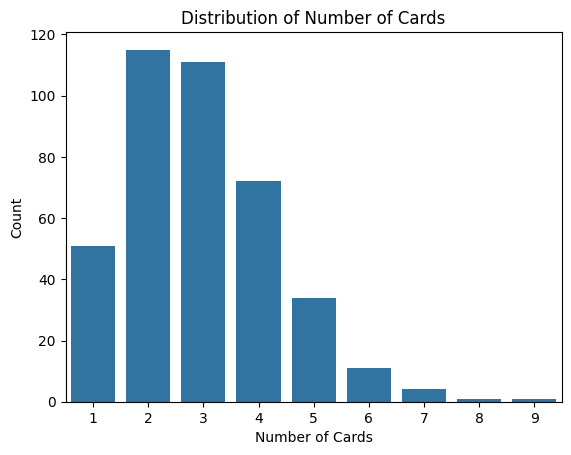

Cards        1.000000
Balance      0.086456
Rating       0.053239
Age          0.042948
Limit        0.010231
Income      -0.018273
inc_gt_50   -0.026562
Education   -0.051084
Name: Cards, dtype: float64


In [147]:
print(df["Cards"].describe())

sns.countplot(x=df["Cards"])
plt.title("Distribution of Number of Cards")
plt.xlabel("Number of Cards")
plt.ylabel("Count")
plt.show()

correlation_matrix = df.corr()
print(correlation_matrix["Cards"].sort_values(ascending=False))

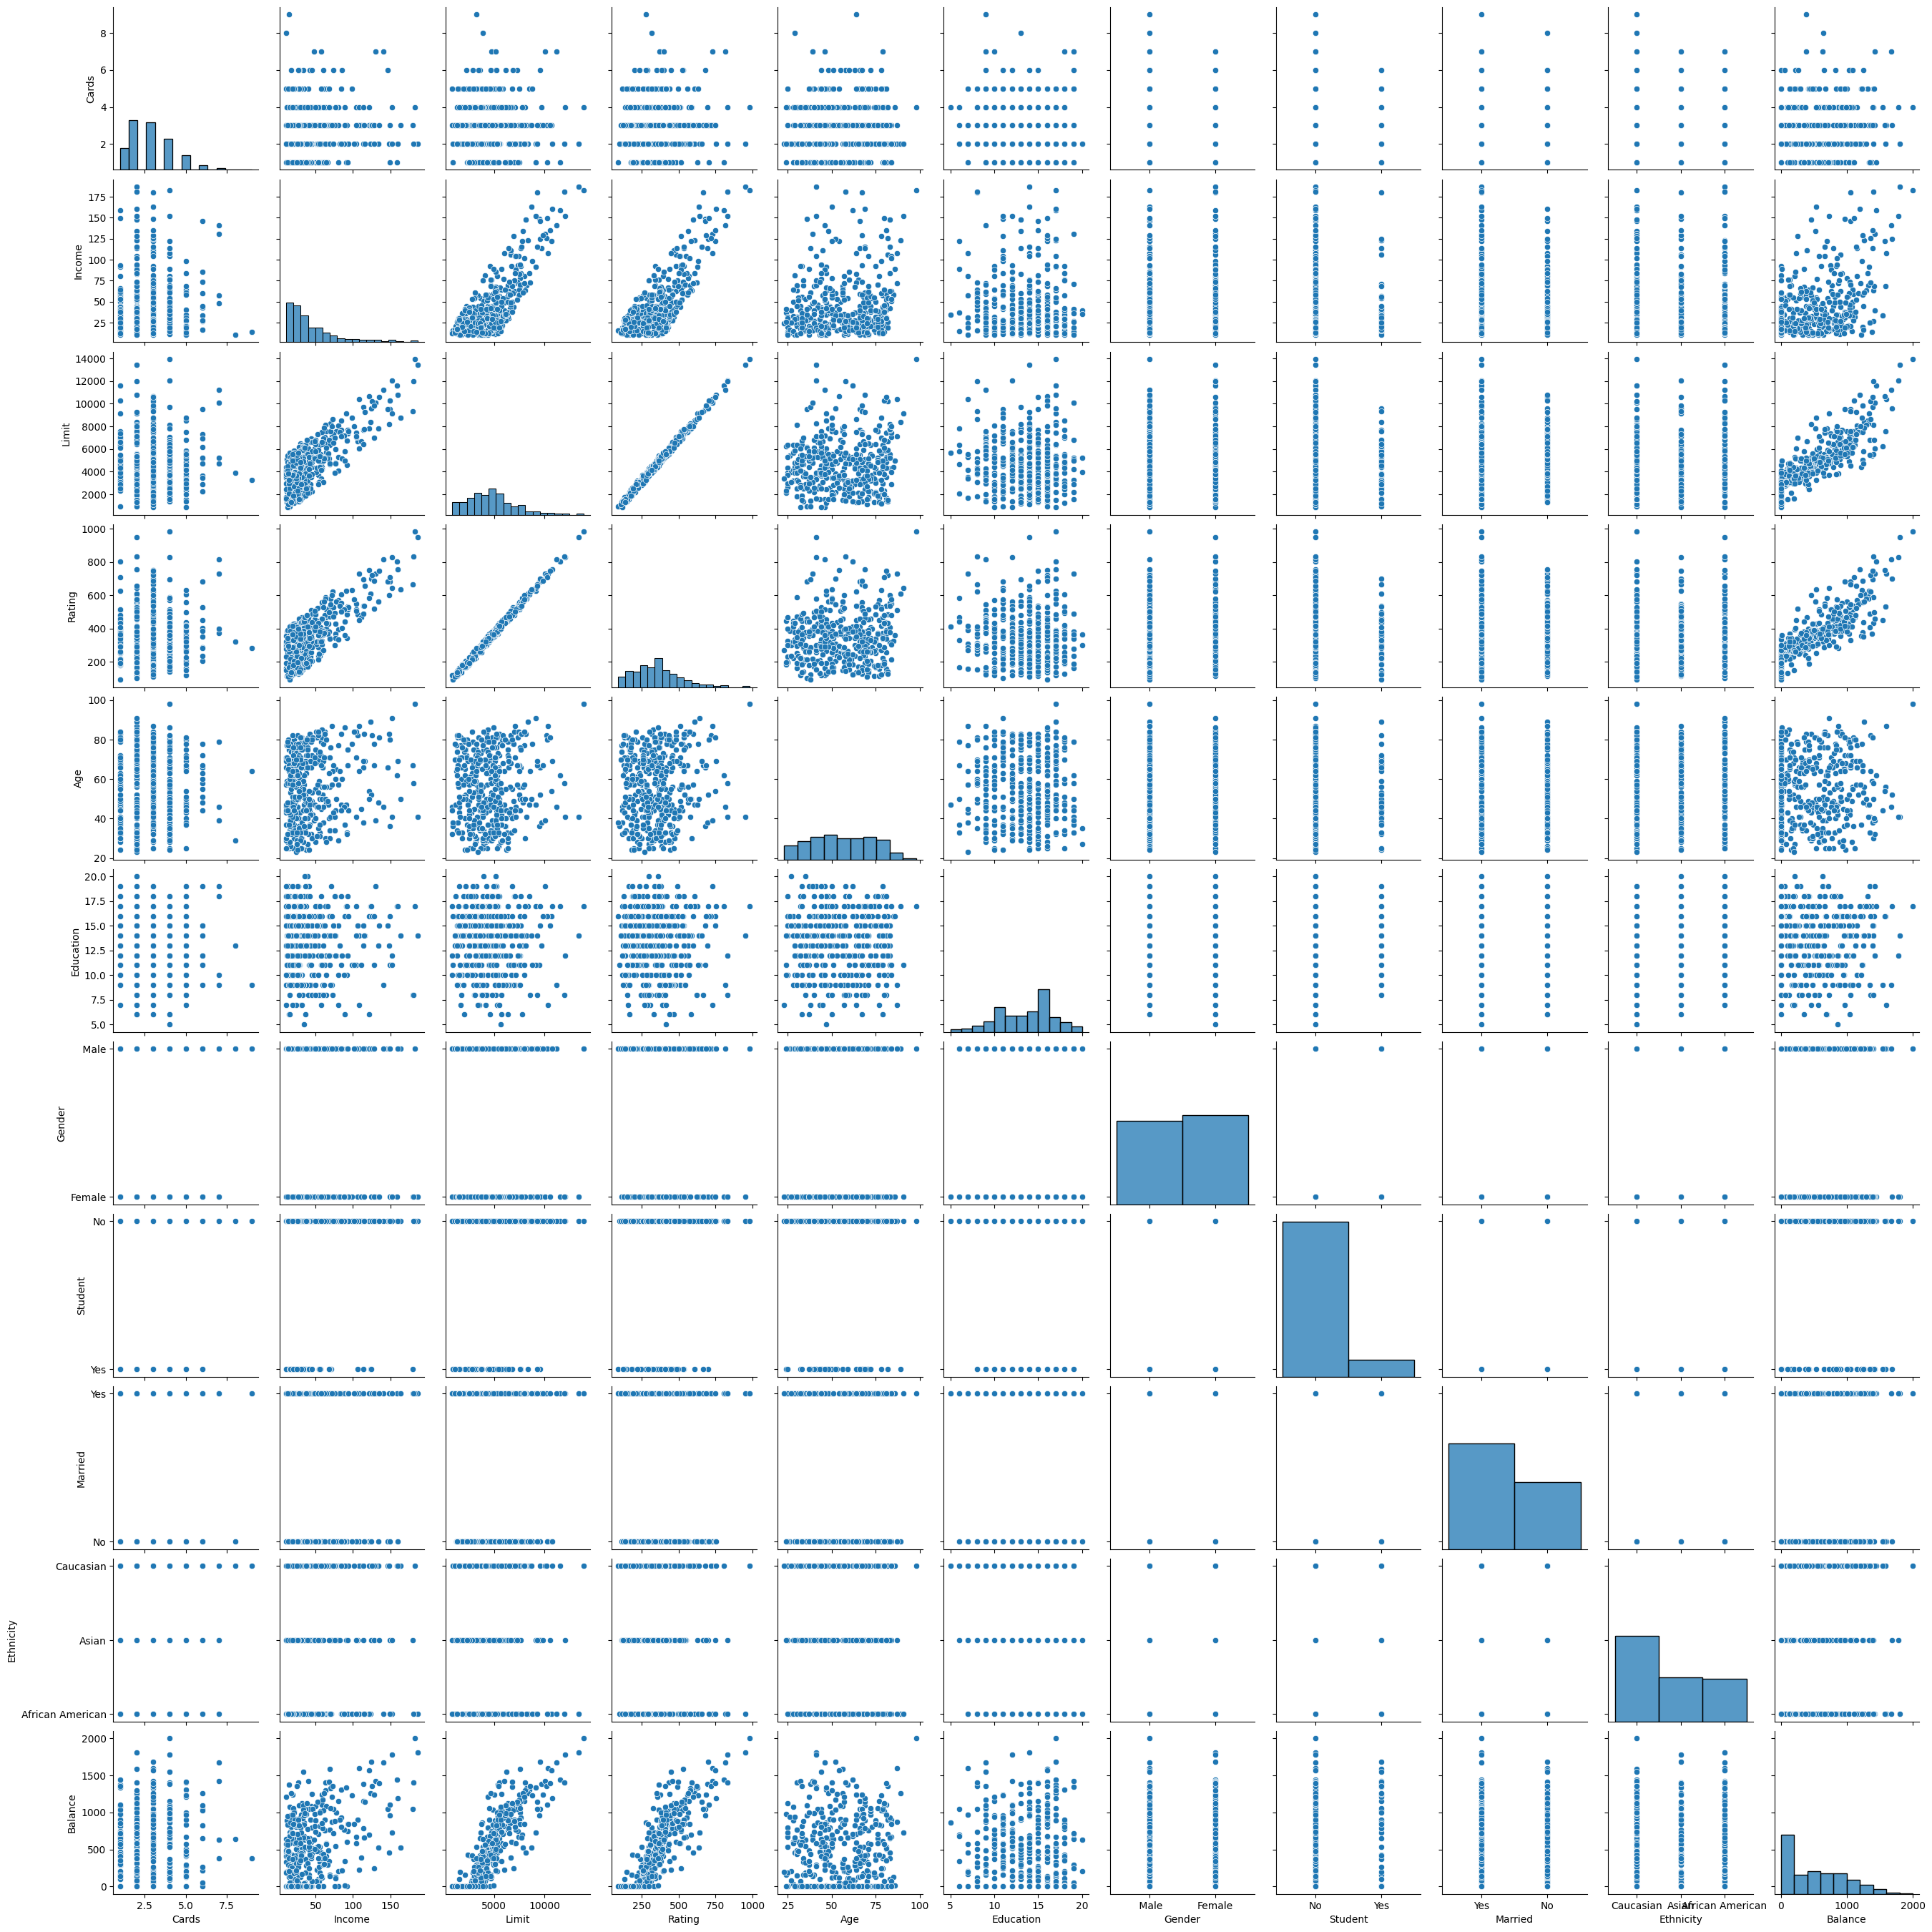

In [140]:
sns.pairplot(df, vars=["Cards", "Income", "Limit", "Rating", "Age", "Education", "Gender", "Student", "Married", "Ethnicity", "Balance"])
plt.show()